### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Dataset Overview

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Summary Statistics

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Tasks

### **1. Data Preprocessing**

### Handling Missing Values

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64



*   The CustomerID column contains nearly 25% of missing data. Imputing such a substantial proportion of missing values could potentially add unwanted variability to the analysis. Given that the clustering relies on customer behavior and preferences, ensuring accurate data on customer identifiers is necessary. Therefore, removing rows with missing CustomerIDs appears to be the most logical strategy to maintain the integrity of the clusters and the analysis.




In [8]:
df = df.dropna(subset=['CustomerID', 'Description'])

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Handling Duplicates

In [10]:
df_dup = df[df.duplicated(keep=False)]

df_dup_sort = df_dup.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

df_dup_sort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,11/4/2011 13:25,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
529980,C580764,22667,RECIPE BOX RETROSPOT,-12,12/6/2011 10:38,2.95,14562.0,United Kingdom



*  The existence of entirely identical rows, including matching transaction times, raises concerns about potential data recording errors rather than genuinely repeated transactions. Retaining such duplicate rows could introduce unwanted noise and potential inaccuracies in both the clustering and recommendation system.



*  So we plan to eliminate these entirely identical duplicate rows from the dataset to enhance the reliability of the data used in the analysis.













In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(401604, 8)

### Converting Data Types

In [13]:
df['CustomerID'] = df['CustomerID'].astype('int64')

In [14]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Cancelled Transactions


In [16]:
cancelled_trans = df.loc[df['Quantity'] < 0, 'InvoiceNo']

print(cancelled_trans)

141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 8872, dtype: object


To enhance our comprehension of customer behavior and preferences, it is essential to consider transactions that were cancelled. Our initial step involves identifying these transactions by filtering rows where the InvoiceNo starts with "C."

In [17]:
cancelled_transactions = df[df['InvoiceNo'].astype(str).str.startswith('C')]
cancelled_transactions.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953
std,1172.249902,445.190864,1708.230387
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13505.000000
50%,-2.000000,2.950000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000



*   All quantities in the cancelled transactions are negative, indicating that these are indeed orders that were cancelled.




In [18]:
df['UnitPrice'].describe()

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [19]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,40.000000
mean,347.100000
std,1978.311813
min,1.000000
25%,1.000000
50%,4.500000
75%,24.000000
max,12540.000000


We will only consider the products with UnitPrice>0.

In [20]:
df = df[df['UnitPrice'] > 0]

In [21]:
df['UnitPrice'].describe()

count    401564.000000
mean          3.474410
std          69.767501
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

Calculating the Total Amount spent by customers for each purchase.

In [22]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [23]:
df.reset_index(drop=True, inplace=True)

In [24]:
df.shape

(401564, 9)

### **2. RFM Calculation**

In [25]:
df_p= df[df['Quantity']>0]
df_p['InvoiceDay'] = df_p['InvoiceDate'].dt.date

### Recency (R): This metric indicates how recently a customer has made a purchase.

In [26]:
recent_date = df_p['InvoiceDay'].max() + pd.DateOffset(days=1)


recency_df = df_p.groupby('CustomerID')['InvoiceDay'].max().reset_index()
recent_date=pd.to_datetime(recent_date)
recency_df['InvoiceDay']=pd.to_datetime(recency_df['InvoiceDay'])
recency_df['Recency'] = (recent_date - recency_df['InvoiceDay']).dt.days
recency_df = recency_df[['CustomerID', 'Recency']]



### Frequency (F): This metric signifies how often a customer makes a purchase within a certain period.

In [27]:
frequency_df = df_p.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']


### Monetary (M): This metric represents the total amount of money a customer has spent over a certain period.

In [28]:
df_p['TotalPrice'] = df_p['Quantity'] * df_p['UnitPrice']
monetary_df = df_p.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']


In [29]:
customer_df = pd.merge(recency_df, frequency_df, on='CustomerID')
customer_df = pd.merge(customer_df, monetary_df, on='CustomerID')


customer_df

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,3,7,4310.00
2,12348,76,4,1797.24
3,12349,19,1,1757.55
4,12350,311,1,334.40
...,...,...,...,...
4333,18280,278,1,180.60
4334,18281,181,1,80.82
4335,18282,8,2,178.05
4336,18283,4,16,2045.53


### **3. RFM Segmentation**

Customer Segmentation Scoring Method

Assigns scores based on quantiles for recency, frequency, and monetary values

In [30]:
customer_df["recency_score"] = pd.qcut(customer_df["Recency"], 5, labels = [5,4,3,2,1])
customer_df["frequency_score"] = pd.qcut(customer_df["Frequency"].rank(method = "first"), 5, labels = [1,2,3,4,5])
customer_df["monetary_score"] = pd.qcut(customer_df["Monetary"], 5, labels = [1,2,3,4,5])
customer_df["customer_df_SCORE"] = (customer_df['recency_score'].astype(str) + customer_df["frequency_score"].astype(str))

customer_df.head()

,CustomerID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,customer_df_SCORE
0,12346,326,1,77183.60,1,1,5,11
1,12347,3,7,4310.00,5,5,5,55
2,12348,76,4,1797.24,2,4,4,24
3,12349,19,1,1757.55,4,1,4,41
4,12350,311,1,334.40,1,1,2,11


In [31]:
customer_df['customer_df_SCORE'] = pd.to_numeric(customer_df['customer_df_SCORE'], errors='coerce')

Loyalty Level Assignment

Categorizes customers into loyalty levels (Bronze, Silver, Gold, Platinum, Diamond) based on scoring


In [32]:
bins = ['Bronze', 'Silver', 'Gold', 'Platinum','Diamond']
customer_df['Loyalty_Level'] = pd.qcut(customer_df['customer_df_SCORE'], q=5, labels= bins)
customer_df.head()


,CustomerID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,customer_df_SCORE,Loyalty_Level
0,12346,326,1,77183.60,1,1,5,11,Bronze
1,12347,3,7,4310.00,5,5,5,55,Diamond
2,12348,76,4,1797.24,2,4,4,24,Silver
3,12349,19,1,1757.55,4,1,4,41,Gold
4,12350,311,1,334.40,1,1,2,11,Bronze


Loyalty Level Analysis

Computes the mean values of Recency, Frequency, Monetary, and Customer Score for each Loyalty Level


In [33]:
loyalty = customer_df.groupby('Loyalty_Level')[['Recency', 'Frequency', 'Monetary', 'customer_df_SCORE']].mean()
loyalty

,Recency,Frequency,Monetary,customer_df_SCORE
Loyalty_Level,,,,
Bronze,240.777256,1.409774,609.887294,13.628759
Silver,102.879518,2.507229,922.836966,24.695181
Gold,48.126582,3.322785,1368.687582,34.281013
Platinum,23.287532,5.110687,2210.512164,43.790076
Diamond,6.671659,9.572581,5361.299977,54.072581


### **Customer Behaviour and potential targeting techniques for each Loyalty Level:**

**Diamond**: People in this group are more frequent buyers with average days since the last purchase is 7 and average number of times they have transacted in the platform is about 10 times in the last 1 year. Also, their average sales value is 5.3K pounds. These are your most loyal customers, who bought recently, most often, and are heavy spenders. Reward these customers so that they can become an early adopters for your future products and help to promote your brand.

**Platinum**: This group has an average frequency of 5 times and recency of 23 days. Also, their average sales value is 2.2K pounds. These are your loyal customers with a good frequency and who spent a good amount.  Reward these customers and give special discounts and help them become your Diamond members.

**Gold**: This group has an average frequency of 3-4 times and recency of 48 days. This group is also high spenders with average sales of about 1.3K pounds. These are your recent customers with an average frequency and who spent a good amount. Offer membership or loyalty programs or recommend related products to upsell them and help them become your Platinum members.

**Silver**: People in this group have made a transaction on the platform about 102 days ago. Their frequency and monetary values are 3 times and 922 pounds respectively. These are your customers who purchased a decent number of times and spent good amounts, but haven’t purchased recently. Sending them personalized campaigns, offers, and product recommendations will help to reconnect with them.

**Bronze**: This is the dormant group with average days since their last purchase is 240. They have transacted around 2 times in the platform with average sales of 609 pounds. These are customers who used to visit and purchase in your platform, but haven’t been visiting recently. Bring them back with relevant promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.

### **4. Customer Segmentation**

In [34]:
scaler = StandardScaler()
rfm_sc = scaler.fit_transform(customer_df[['Recency','Frequency','Monetary']])
rfm_sc_df = pd.DataFrame(rfm_sc, columns=['Sc_Recency', 'Sc_Frequency', 'Sc_Monetary'])

rfm_sc_df.head()


,Sc_Recency,Sc_Frequency,Sc_Monetary
0,2.329388,-0.425097,8.363010
1,-0.900588,0.354417,0.251699
2,-0.170593,-0.035340,-0.027988
3,-0.740589,-0.425097,-0.032406
4,2.179389,-0.425097,-0.190812


K-Means Clustering: Elbow Method

Determines the optimal number of clusters (K) using the Elbow Method and plots the within-cluster sum of squares (WCSS)


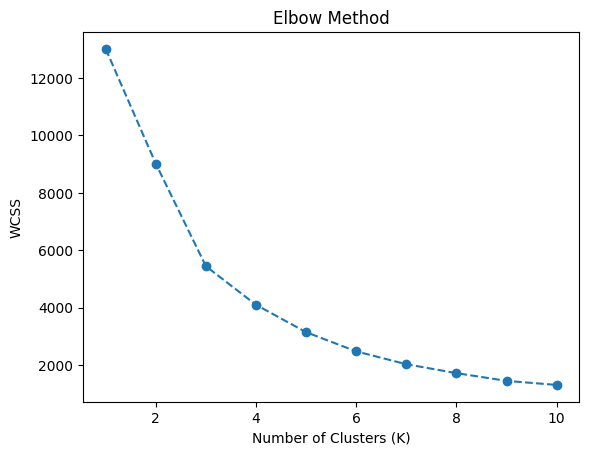

In [35]:

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(rfm_sc)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


Optimal number of clusters determined using the Elbow Method are 4.

In [36]:
clusters = 4

kmeans = KMeans(n_clusters=clusters, n_init =10, random_state=0)

customer_df["Cluster"] = kmeans.fit_predict(rfm_sc_df)

customer_df = pd.concat([customer_df, rfm_sc_df], axis=1)

customer_df.head()

,CustomerID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,customer_df_SCORE,Loyalty_Level,Cluster,Sc_Recency,Sc_Frequency,Sc_Monetary
0,12346,326,1,77183.60,1,1,5,11,Bronze,3,2.329388,-0.425097,8.363010
1,12347,3,7,4310.00,5,5,5,55,Diamond,2,-0.900588,0.354417,0.251699
2,12348,76,4,1797.24,2,4,4,24,Silver,2,-0.170593,-0.035340,-0.027988
3,12349,19,1,1757.55,4,1,4,41,Gold,2,-0.740589,-0.425097,-0.032406
4,12350,311,1,334.40,1,1,2,11,Bronze,0,2.179389,-0.425097,-0.190812


Silhouette Analysis for Optimal Clusters

Evaluates silhouette scores for different numbers of clusters using K-Means

Helps identify the optimal number of clusters based on silhouette scores


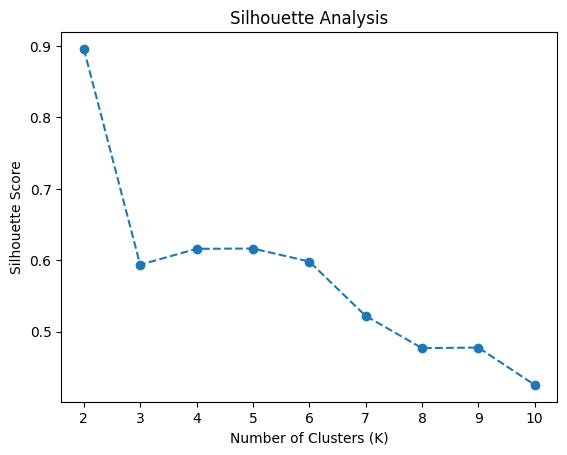

In [37]:
from sklearn.metrics import silhouette_score

sil_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=42)
    kmeans.fit(rfm_sc)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(rfm_sc, labels))

plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


The plot of Silhouette Scores against the number of clusters (K) helps visualize the stability and cohesion of the clusters.

In this case, the Silhouette Analysis for K=4 shows a relatively high and stable Silhouette Score of 0.61 compared to other cluster sizes, it provides additional evidence that having 4 clusters is a reasonable choice for the dataset.

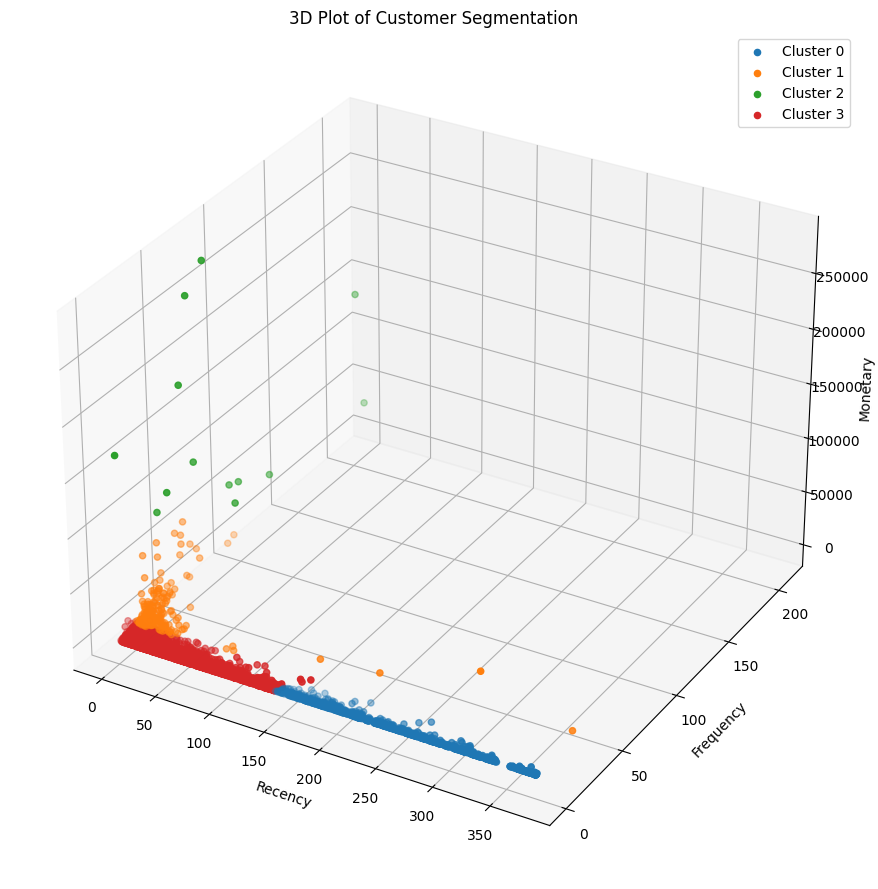

Silhouette Score for 3 clusters: 0.6160244323296572
Segment Profiles:
           CustomerID     Recency  Frequency       Monetary  \
Cluster                                                       
0        15345.693685  249.173421   1.551367     476.416024   
1        15201.928910   16.123223  22.047393   12435.086682   
2        15435.000000    7.615385  82.538462  127187.959231   
3        15290.903046   44.486734   3.655748    1344.410329   

         customer_df_SCORE  Sc_Recency  Sc_Frequency  Sc_Monetary  
Cluster                                                            
0                13.900094    1.561128     -0.353464    -0.175004  
1                51.075829   -0.769357      2.309357     1.156075  
2                52.538462   -0.854435     10.168289    13.928825  
3                38.396987   -0.485724     -0.080065    -0.078391  


In [38]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init= 10,random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(rfm_sc)


fig = plt.figure(figsize=(12, 11))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(4):
    cluster_data = customer_df[customer_df['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Plot of Customer Segmentation')
ax.legend()
plt.show()

silhouette_avg = silhouette_score(rfm_sc, customer_df['Cluster'])
print(f"Silhouette Score for 3 clusters: {silhouette_avg}")

segment_profiles = customer_df.groupby('Cluster').mean()
print("Segment Profiles:")
print(segment_profiles)


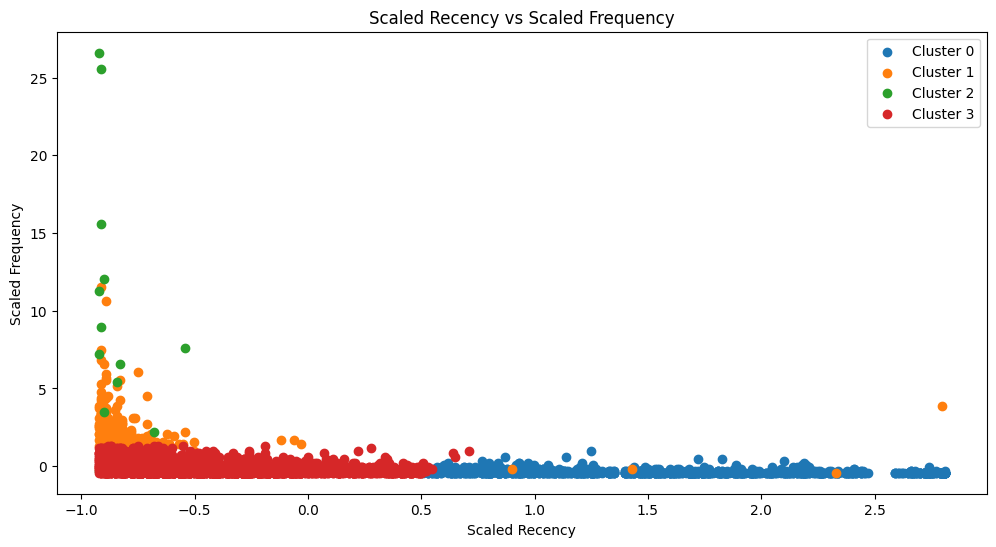

In [39]:
plt.figure(figsize=(12, 6))
for cluster in range(clusters):
    plt.scatter(customer_df[customer_df["Cluster"] == cluster]["Sc_Recency"],
                customer_df[customer_df["Cluster"] == cluster]["Sc_Frequency"],label=f'Cluster {cluster}')
plt.title("Scaled Recency vs Scaled Frequency")
plt.xlabel("Scaled Recency")
plt.ylabel("Scaled Frequency")
plt.legend()
plt.show()

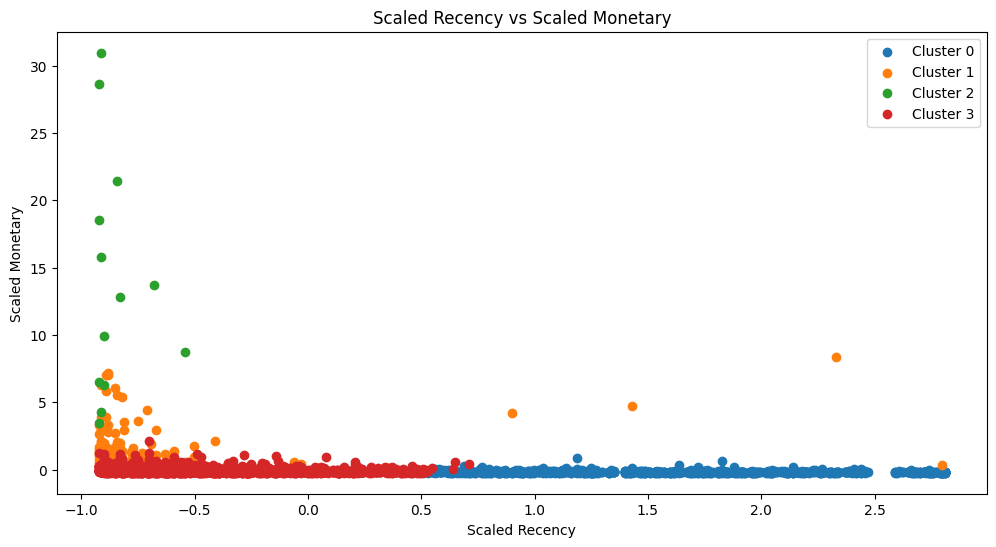

In [40]:
plt.figure(figsize=(12, 6))
for cluster in range(clusters):
    plt.scatter(customer_df[customer_df["Cluster"] == cluster]["Sc_Recency"],
                customer_df[customer_df["Cluster"] == cluster]["Sc_Monetary"],label=f'Cluster {cluster}')
plt.title("Scaled Recency vs Scaled Monetary")
plt.xlabel("Scaled Recency")
plt.ylabel("Scaled Monetary")
plt.legend()
plt.show()

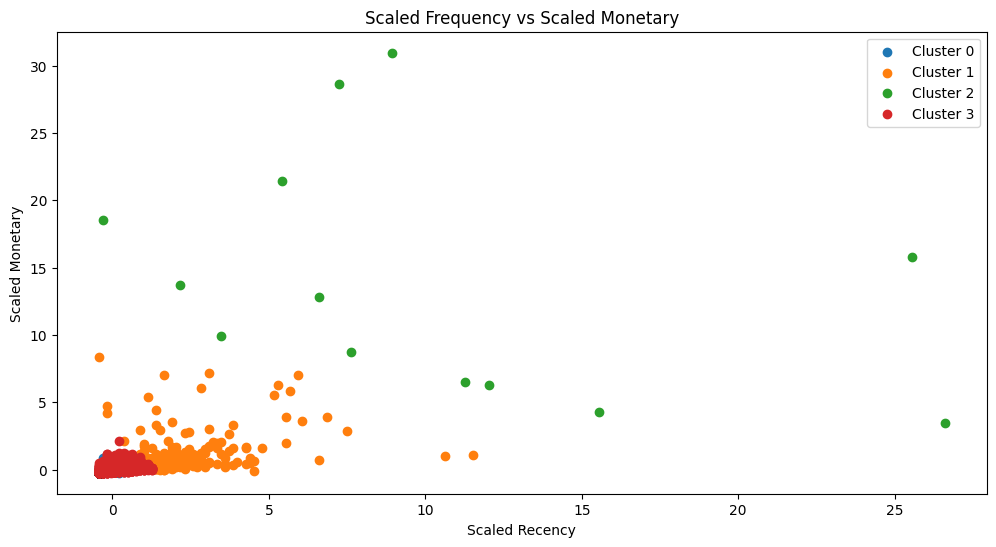

In [41]:
plt.figure(figsize=(12, 6))
for cluster in range(clusters):
    plt.scatter(customer_df[customer_df["Cluster"] == cluster]["Sc_Frequency"],
                customer_df[customer_df["Cluster"] == cluster]["Sc_Monetary"],label=f'Cluster {cluster}')
plt.title("Scaled Frequency vs Scaled Monetary")
plt.xlabel("Scaled Recency")
plt.ylabel("Scaled Monetary")
plt.legend()
plt.show()

In [42]:
agg_list=["mean", "count", "max",]
customer_df[["Cluster", "Recency", "Frequency", "Monetary"]].groupby("Cluster").agg(agg_list)

Recency             Frequency                  Monetary        \
               mean count  max       mean count  max           mean count   
Cluster                                                                     
0        249.173421  1061  374   1.551367  1061   12     476.416024  1061   
1         16.123223   211  373  22.047393   211   93   12435.086682   211   
2          7.615385    13   39  82.538462    13  209  127187.959231    13   
3         44.486734  3053  164   3.655748  3053   14    1344.410329  3053   

                    
               max  
Cluster             
0          9864.26  
1         77183.60  
2        280206.02  
3         21429.39

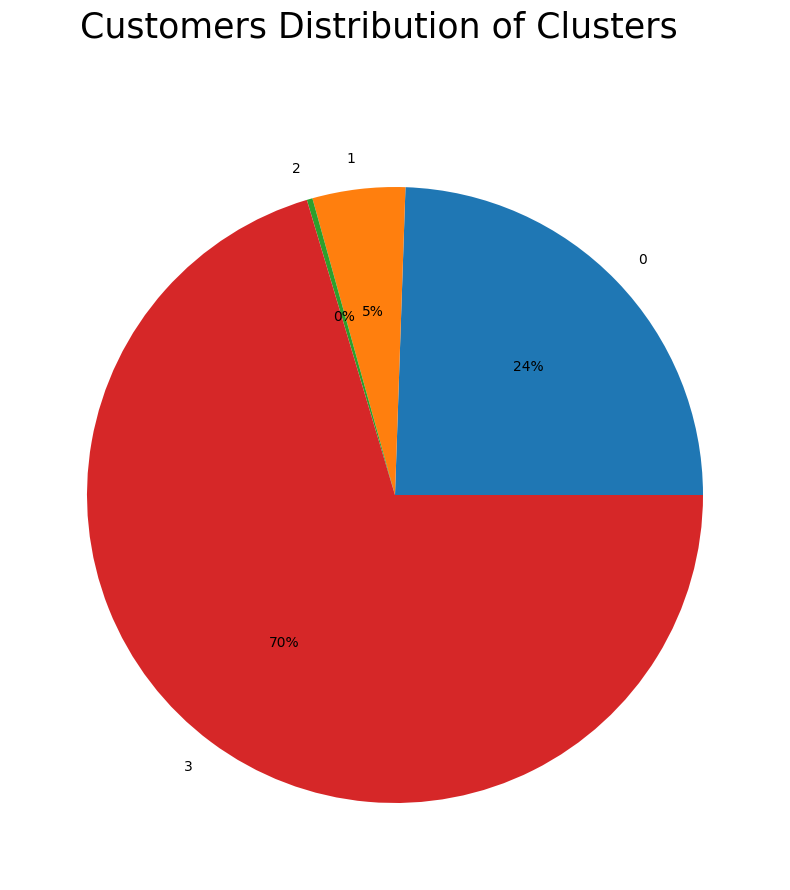

In [43]:
customer_df = customer_df.reset_index()
clusters_count = customer_df.groupby("Cluster").agg({"CustomerID": "count"})
clusters_count.reset_index(inplace=True)
clusters_count.columns = ['Cluster', 'count']

fig  = plt.figure(figsize = (13,10)).suptitle('Customers Distribution of Clusters', fontsize=25)
plt.pie(clusters_count["count"], labels = clusters_count["Cluster"], autopct='%.0f%%')

plt.show()

**Cluster 0:** "Hibernating customers" - Those are the customers that buys at the lowest frequency, the lowest recently and that spend the least money.

**Cluster 1:** " Recent customers" - Those are customers that have been active quite recently that might be interesting to keep stimulated.

**Cluster 2:** "Exceptional customers" - Those are the customers that we want to keep, that buys at the highest frequency, the most recently and that spend the most money.

**Cluster 3:** "Punctual customers" - Those are the customers that buys more punctually items on the website.

### **5.Segment Profiling**

### **Customer Behaviour and potential targeting techniques for each Loyalty Level:**

**Diamond**: People in this group are more frequent buyers with average days since the last purchase is 7 and average number of times they have transacted in the platform is about 10 times in the last 1 year. Also, their average sales value is 5.3K pounds. These are your most loyal customers, who bought recently, most often, and are heavy spenders.

**Platinum**: This group has an average frequency of 5 times and recency of 23 days. Also, their average sales value is 2.2K pounds. These are your loyal customers with a good frequency and who spent a good amount.  

**Gold**: This group has an average frequency of 3-4 times and recency of 48 days. This group is also high spenders with average sales of about 1.3K pounds. These are your recent customers with an average frequency and who spent a good amount.

**Silver**: People in this group have made a transaction on the platform about 102 days ago. Their frequency and monetary values are 3 times and 922 pounds respectively. These are your customers who purchased a decent number of times and spent good amounts, but haven’t purchased recently.

**Bronze**: This is the dormant group with average days since their last purchase is 240. They have transacted around 2 times in the platform with average sales of 609 pounds. These are customers who used to visit and purchase in your platform, but haven’t been visiting recently.

Average amount spent by each customer group:

In [44]:
Avg_amount_spent = customer_df.groupby('Loyalty_Level')['Monetary'].mean().reset_index()
Avg_amount_spent

,Loyalty_Level,Monetary
0,Bronze,609.887294
1,Silver,922.836966
2,Gold,1368.687582
3,Platinum,2210.512164
4,Diamond,5361.299977


Average frequency of each customer group:

In [45]:
Avg_frequency = customer_df.groupby('Loyalty_Level')['Frequency'].mean().reset_index()
Avg_frequency

,Loyalty_Level,Frequency
0,Bronze,1.409774
1,Silver,2.507229
2,Gold,3.322785
3,Platinum,5.110687
4,Diamond,9.572581


In [46]:
segments_count = customer_df.groupby("Loyalty_Level").agg({"CustomerID": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['Loyalty_Level', 'count']
segments_count.head(15)

,Loyalty_Level,count
0,Bronze,1064
1,Silver,830
2,Gold,790
3,Platinum,786
4,Diamond,868


### **6. Marketing Recommendations:**

**Diamond:** Reward these customers so that they can become an early adopters for your future products and help to promote your brand.

**Platinum:** Offer loyalty programs and reward these customers and give special discounts and help them become your Diamond members.

**Gold:** Offer memberships and recommend related products to upsell them and help them become your Platinum members.

**Silver:** Sending them personalized campaigns, offers, and product recommendations will help to reconnect with them.

**Bronze:** Bring them back with relevant promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.

### **7. Visualization:**

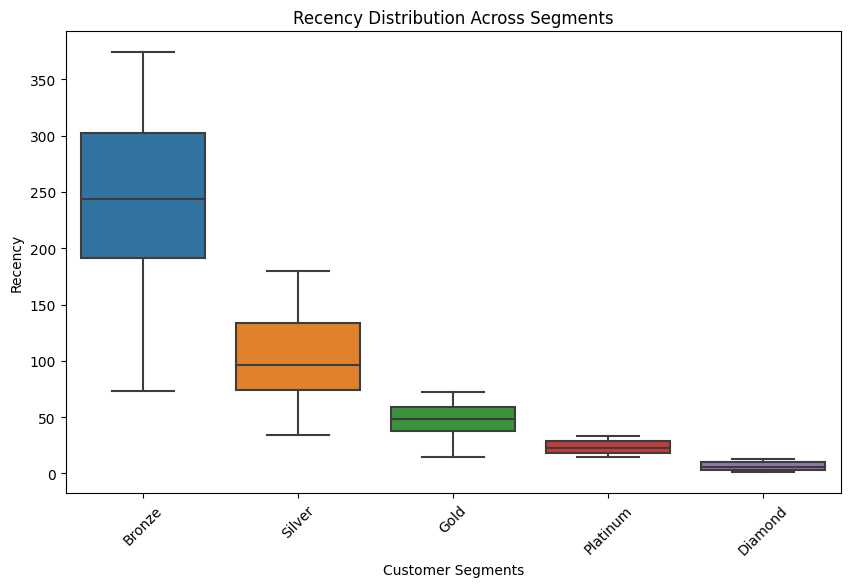

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loyalty_Level', y='Recency', data=customer_df)
plt.title('Recency Distribution Across Segments')
plt.xlabel('Customer Segments')
plt.ylabel('Recency')
plt.xticks(rotation=45)
plt.show()

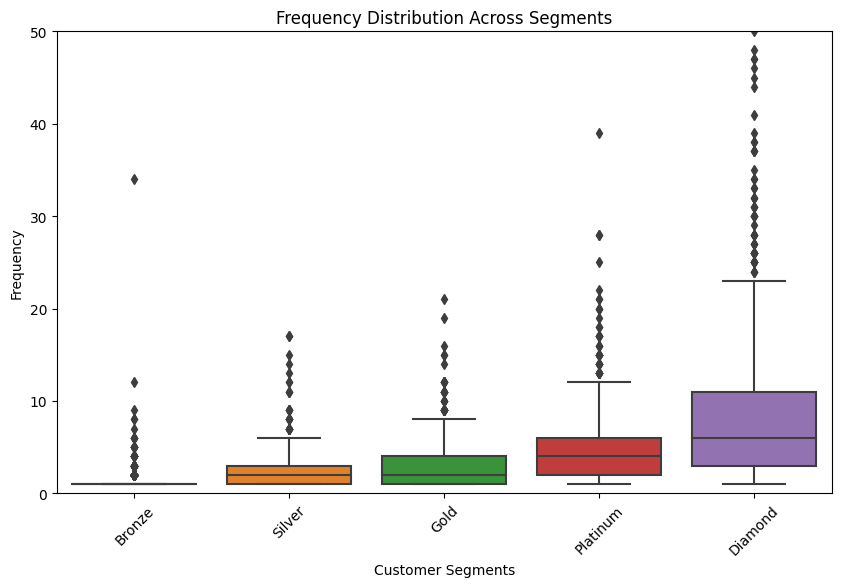

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loyalty_Level', y='Frequency', data=customer_df)
plt.title('Frequency Distribution Across Segments')
plt.xlabel('Customer Segments')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.ylim(0,50)
plt.show()


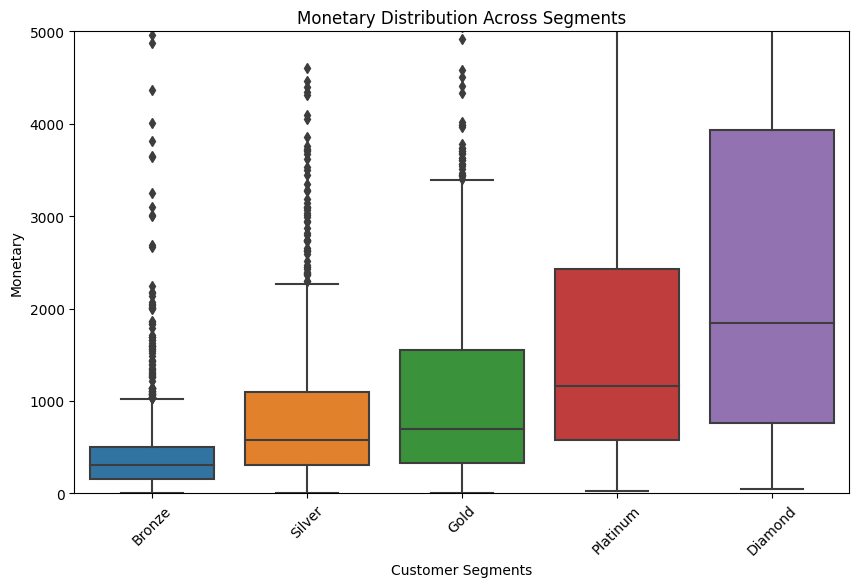

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loyalty_Level', y='Monetary', data=customer_df)
plt.title('Monetary Distribution Across Segments')
plt.xlabel('Customer Segments')
plt.ylabel('Monetary')
plt.xticks(rotation=45)
plt.ylim(0,5000)
plt.show()

### **SOLUTIONS TO THE QUESTIONS:**

### **1. Data Overview**

In [50]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
401559,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
401560,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
401561,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
401562,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [51]:
df.shape

(401564, 9)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401564 entries, 0 to 401563
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401564 non-null  object        
 1   StockCode    401564 non-null  object        
 2   Description  401564 non-null  object        
 3   Quantity     401564 non-null  int64         
 4   InvoiceDate  401564 non-null  datetime64[ns]
 5   UnitPrice    401564 non-null  float64       
 6   CustomerID   401564 non-null  int64         
 7   Country      401564 non-null  object        
 8   TotalPrice   401564 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 27.6+ MB


* The Dataset consists of 541909 rows and 8 columns.

**Description of each column in the dataset**

*InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.

*StockCode: Product code that consists 5 digits.

*Description: Product name.

*Quantity: The quantities of each product per transaction.

*InvoiceDate: Represents the day and time when each transaction was generated.

*UnitPrice: Product price per unit.

*CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.

*Country: Name of the country where each customer resides.

In [53]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())
print(f"The time period covered in dataset in: {df['InvoiceDate'].max()-df['InvoiceDate'].min()}")

2010-12-01 08:26:00
2011-12-09 12:50:00
The time period covered in dataset in: 373 days 04:24:00


### **2. Customer Analysis**

In [54]:
print(f"The number of unique customers are: {df['CustomerID'].nunique()}")

The number of unique customers are: 4371


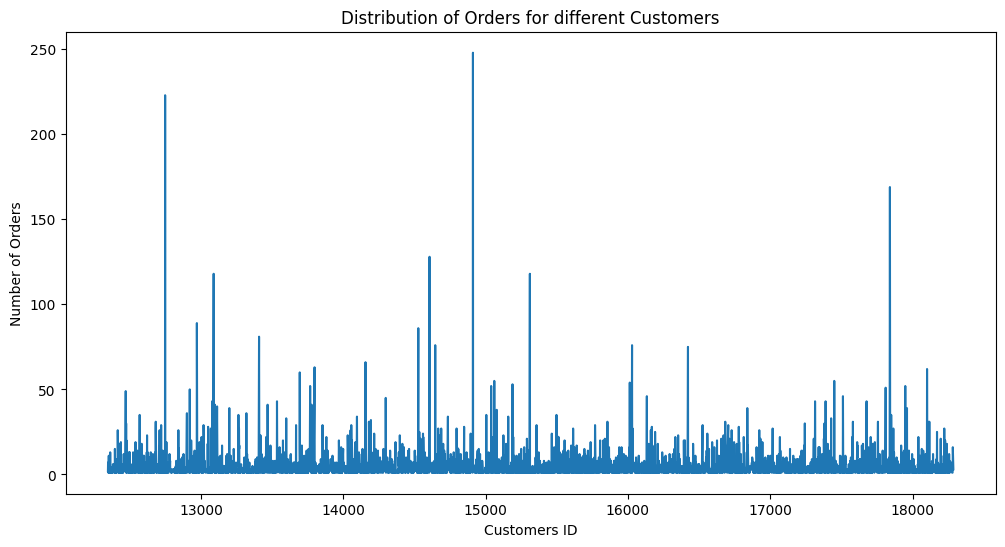

In [55]:
orders = df.groupby(by='CustomerID', as_index= False)['InvoiceNo'].nunique()

plt.subplots(figsize=(12,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders for different Customers')
plt.show()


Top 5 customers with the most purchases by order count:
 Customer ID 
1894    14911
330     12748
4041    17841
1673    14606
568     13089
Name: CustomerID, dtype: int64


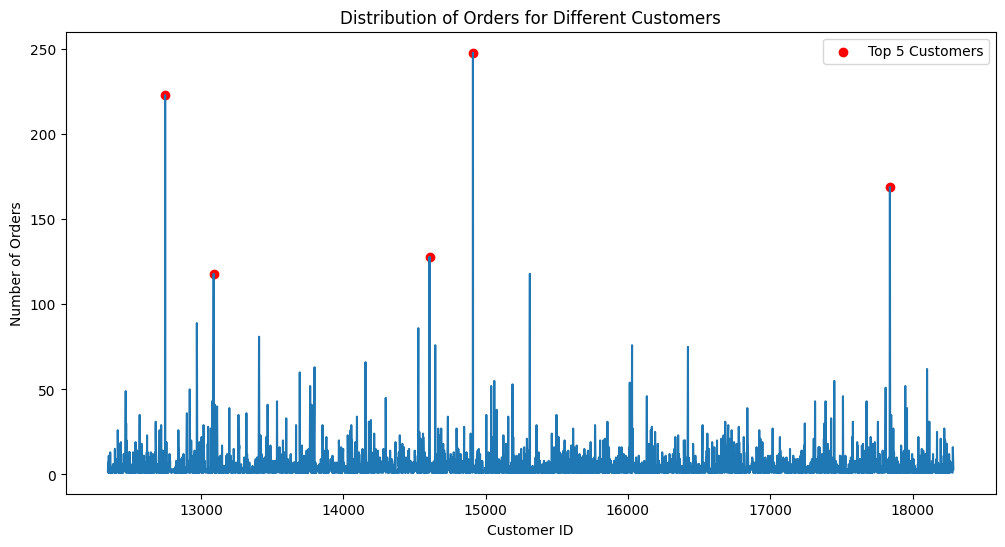

In [56]:

top_customers = orders.sort_values(by='InvoiceNo', ascending=False)

top_5_customers = top_customers.head(5)

print("Top 5 customers with the most purchases by order count:")
print(f" Customer ID \n{top_5_customers['CustomerID']}")

plt.subplots(figsize=(12, 6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.scatter(top_5_customers.CustomerID, top_5_customers.InvoiceNo, color='red', label='Top 5 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders for Different Customers')
plt.legend()
plt.show()


### **3. Product Analysis**

Top 10 most frequently purchased products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2013
REGENCY CAKESTAND 3 TIER              1883
JUMBO BAG RED RETROSPOT               1643
PARTY BUNTING                         1398
ASSORTED COLOUR BIRD ORNAMENT         1385
LUNCH BAG RED RETROSPOT               1329
SET OF 3 CAKE TINS PANTRY DESIGN      1218
POSTAGE                               1194
LUNCH BAG  BLACK SKULL.               1073
PACK OF 72 RETROSPOT CAKE CASES       1041
Name: InvoiceNo, dtype: int64


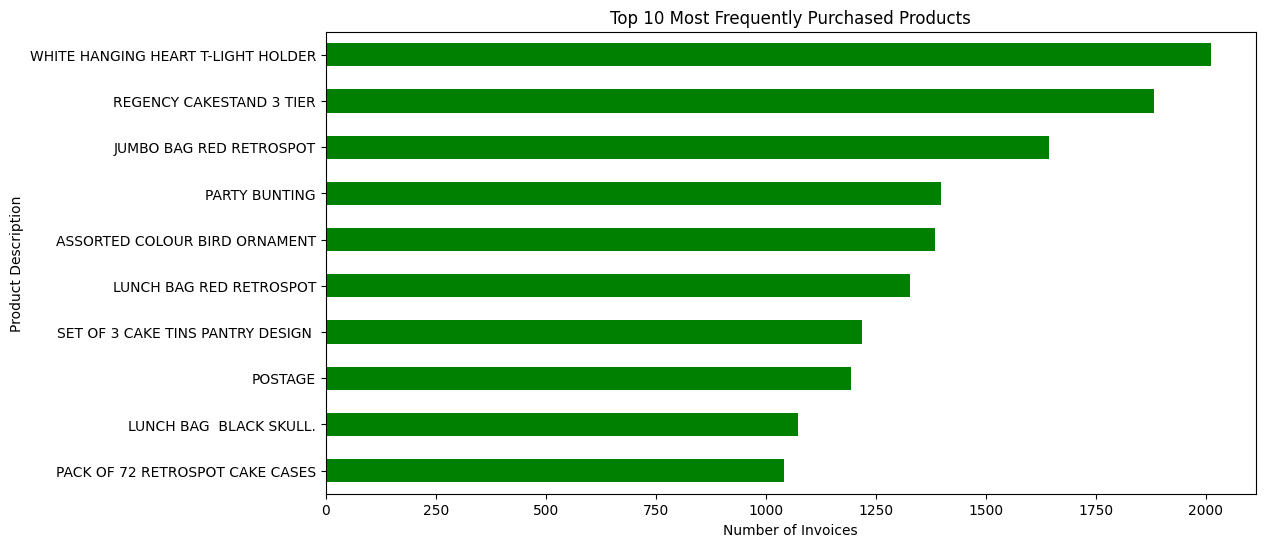

In [57]:
product_invoices = df.groupby('Description')['InvoiceNo'].nunique()

top_products = product_invoices.sort_values(ascending=False)

top_10_products = top_products.head(10)

print("Top 10 most frequently purchased products:")
print(top_10_products)

plt.figure(figsize=(12, 6))
top_10_products.sort_values().plot(kind='barh', color='green')
plt.xlabel('Number of Invoices')
plt.ylabel('Product Description')
plt.title('Top 10 Most Frequently Purchased Products')
plt.show()

In [58]:
average_price = df_p['TotalPrice'].sum()/df_p["Quantity"].sum()

print("Average Price of Products: {:.2f}".format(average_price))


Average Price of Products: 1.73


In [59]:
product_revenue = df_p.groupby('Description')['TotalPrice'].sum()

max_revenue_product = product_revenue.idxmax()
max_revenue = product_revenue.max()

print("Product category generating the highest revenue:")
print("Product: ", max_revenue_product)
print("Total Revenue: {:.2f}".format(max_revenue))

Product category generating the highest revenue:
Product:  PAPER CRAFT , LITTLE BIRDIE
Total Revenue: 168469.60


### **4. Time Analysis**

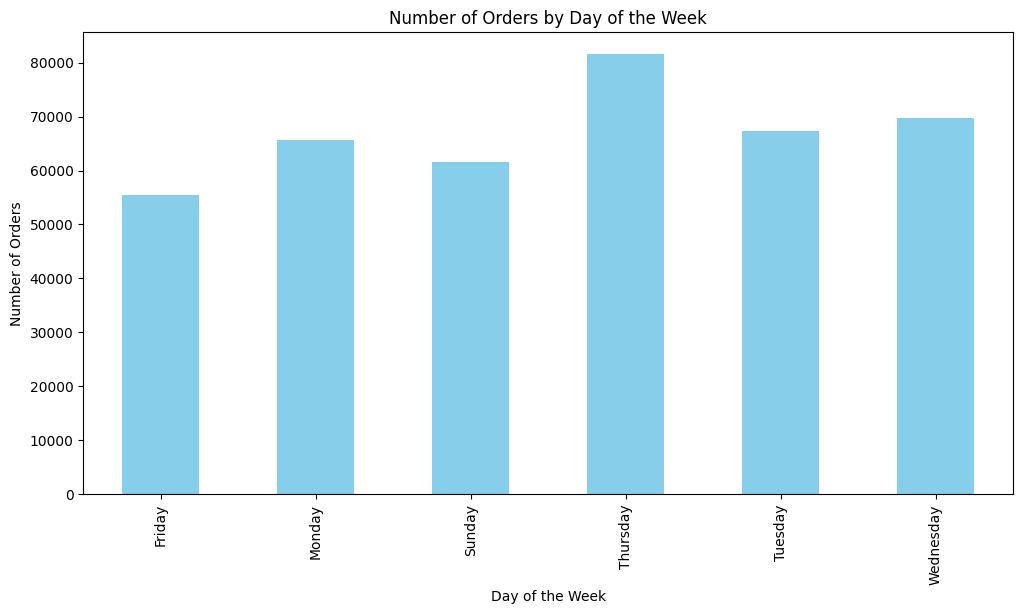

In [60]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()


plt.figure(figsize=(12, 6))
df['DayOfWeek'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of the Week')
plt.show()


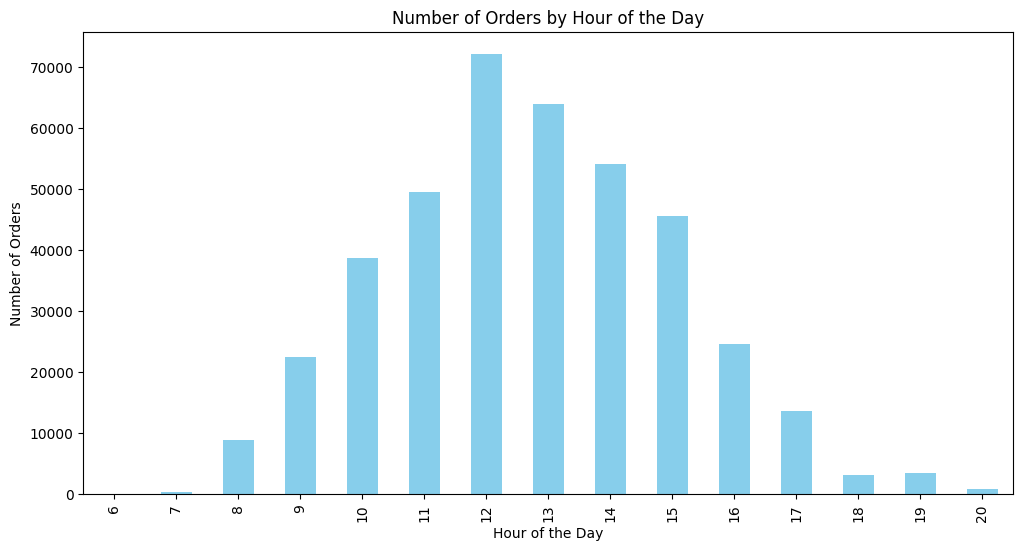

In [61]:
df['HourOfDay'] = df['InvoiceDate'].dt.hour


plt.figure(figsize=(12, 6))
df['HourOfDay'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of the Day')
plt.show()



*  The calculation of the average order processing time is not possible due to insufficient data.




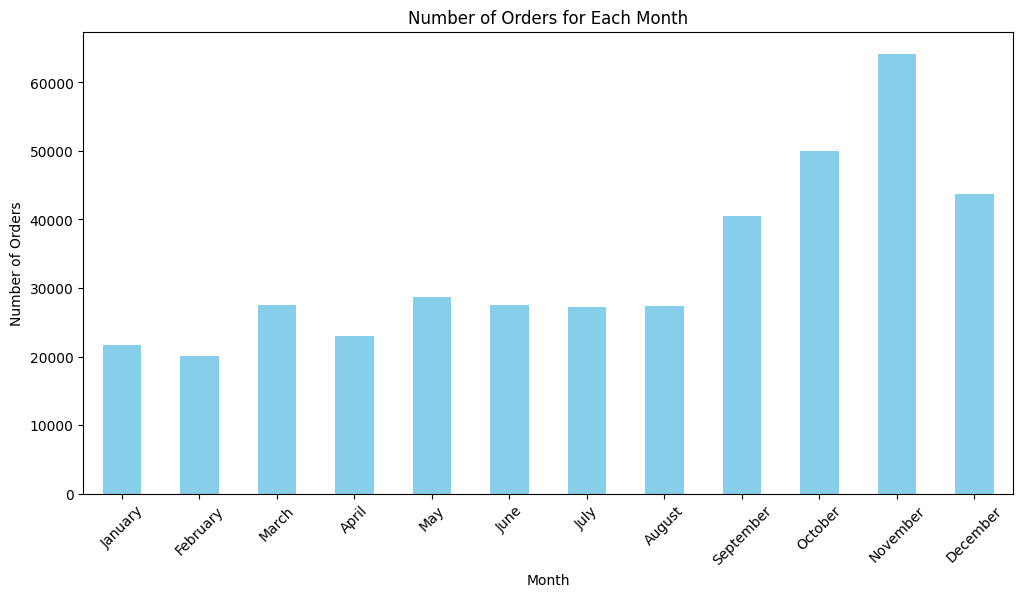

In [62]:
df['Month'] = df['InvoiceDate'].dt.strftime('%B')

months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(12, 6))
order_counts = df['Month'].value_counts().reindex(months_order, fill_value=0)
order_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Each Month')
plt.xticks(rotation=45)
plt.show()

### **5. Geographical Analysis**

Country
United Kingdom    19854
Germany             603
France              458
EIRE                319
Belgium             119
Name: InvoiceNo, dtype: int64


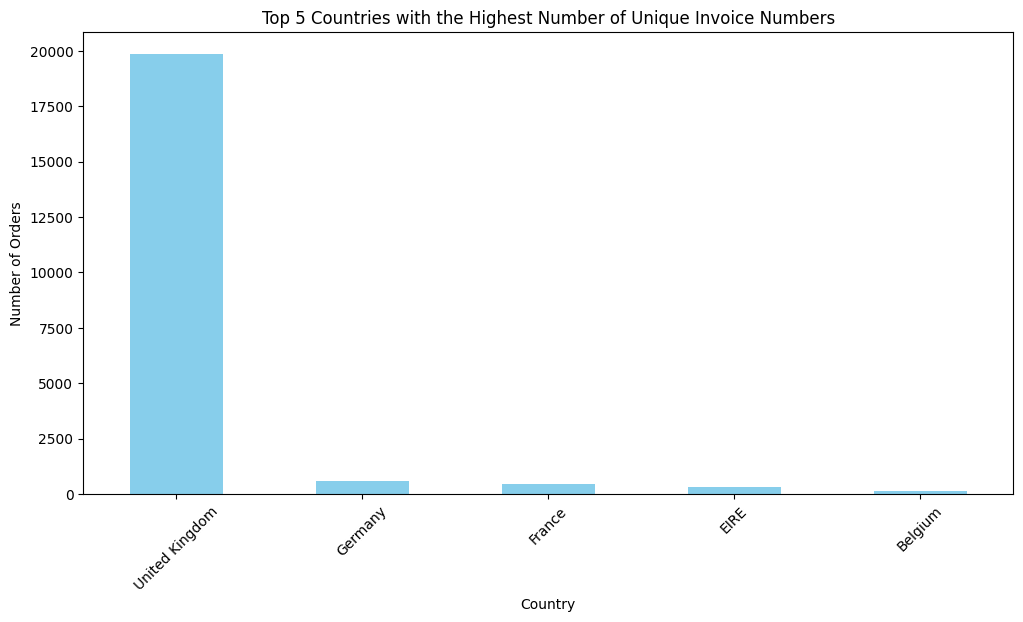

In [63]:

unique_orders_by_country = df.groupby('Country')['InvoiceNo'].nunique().nlargest(5)

print(unique_orders_by_country)

plt.figure(figsize=(12, 6))
unique_orders_by_country.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Top 5 Countries with the Highest Number of Unique Invoice Numbers')
plt.xticks(rotation=45)
plt.show()


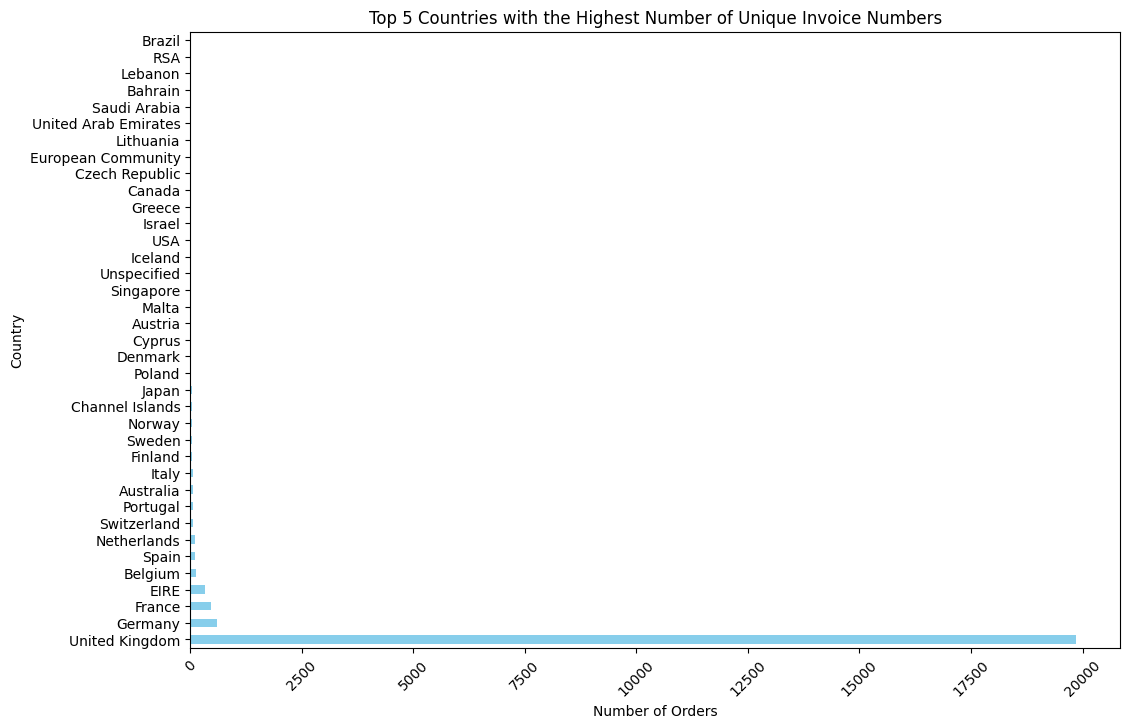

In [64]:
unique_orders_by_country = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
unique_orders_by_country.plot(kind='barh', color='skyblue')
plt.ylabel('Country')
plt.xlabel('Number of Orders')
plt.title('Top 5 Countries with the Highest Number of Unique Invoice Numbers')
plt.xticks(rotation=45)
plt.show()


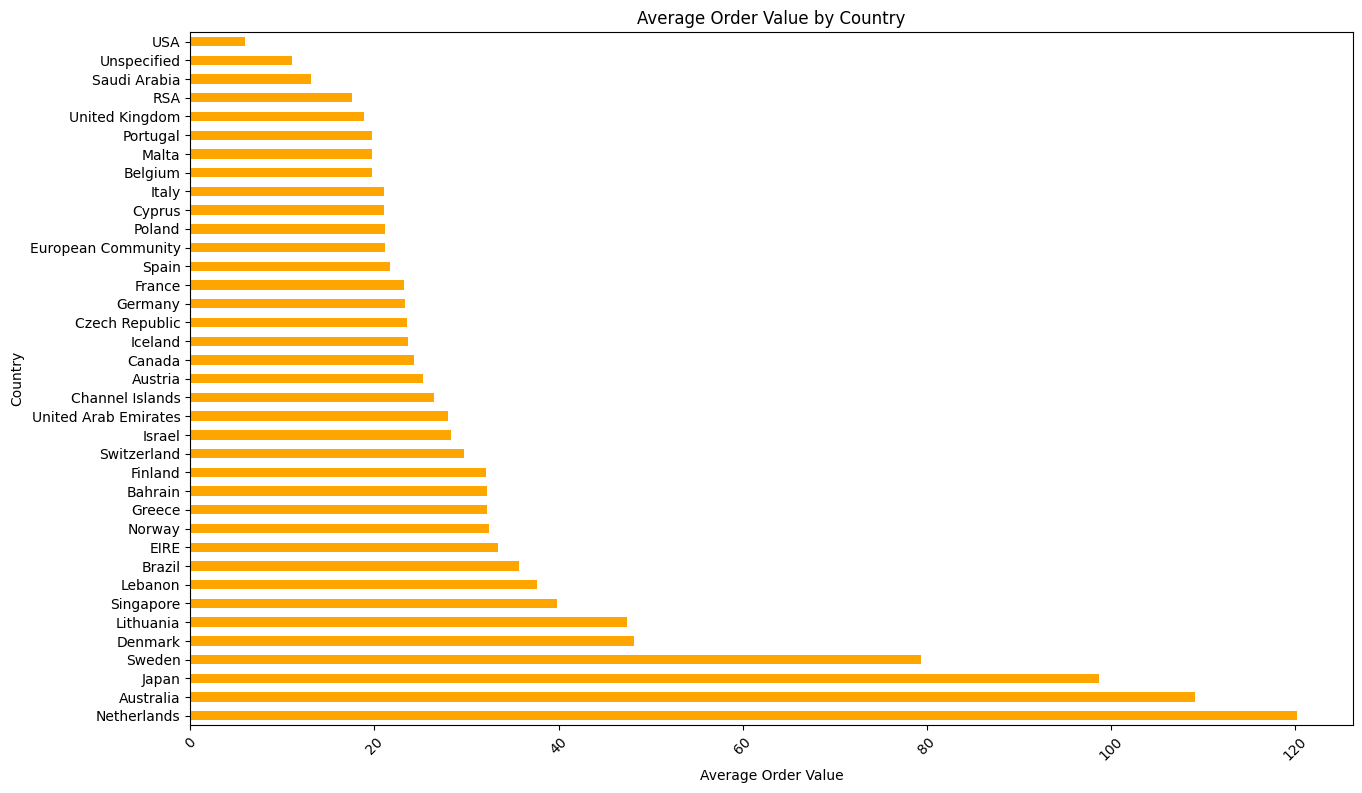

In [65]:
avg_order_value_by_country = df.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 9))
avg_order_value_by_country.plot(kind='barh',color='orange')
plt.ylabel('Country')
plt.xlabel('Average Order Value')
plt.title('Average Order Value by Country')
plt.xticks(rotation=45)
plt.show()

### **6. Payment Analysis**

We cannot perform payment analysis due to insufficient data on payment methods. Therefore we cannot conclude any relationship between the payment method and the order amount.


### **7. Customer Behavior**

In [66]:
df['First_Pur_Date'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df['Last_Pur_Date'] = df.groupby('CustomerID')['InvoiceDate'].transform('max')
average_activity_duration = (df['Last_Pur_Date'] - df['First_Pur_Date']).mean()

print("Average Duration of Customer Activity:", average_activity_duration)

Average Duration of Customer Activity: 243 days 01:52:31.191441460


In [67]:
df['Latest'] = (pd.to_datetime('today') - df['Last_Pur_Date']).dt.days
df['Segment'] = pd.qcut(df['Latest'], q=3, labels=['Inactive','Infrequent', 'Frequent'])

df[['CustomerID', 'Segment']]


,CustomerID,Segment
0,17850,Frequent
1,17850,Frequent
2,17850,Frequent
3,17850,Frequent
4,17850,Frequent
...,...,...
401559,12680,Inactive
401560,12680,Inactive
401561,12680,Inactive
401562,12680,Inactive


### **8. Returns and Refunds**

In [68]:
refunded_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

print(f"The percentage of orders that have experienced returns or refunds are: {refunded_percentage:.2f}%")

The percentage of orders that have experienced returns or refunds are: 2.21%


In [69]:
df['Returned'] = df['InvoiceNo'].astype(str).str.startswith('C')

return_stats_by_category = df.groupby('Description')['Returned'].agg(['sum', 'count'])
return_stats_by_category['ReturnPercentage'] = (return_stats_by_category['sum'] / return_stats_by_category['count']) * 100

return_stats_by_category = return_stats_by_category[return_stats_by_category['ReturnPercentage'] > 0]
return_stats_by_category[['sum', 'ReturnPercentage']].sort_values(by='ReturnPercentage')

,sum,ReturnPercentage
Description,,
PACK OF 72 SKULL CAKE CASES,1,0.197628
SPACEBOY BIRTHDAY CARD,1,0.252525
SET/20 RED RETROSPOT PAPER NAPKINS,2,0.267380
4 TRADITIONAL SPINNING TOPS,1,0.268817
SMALL DOLLY MIX DESIGN ORANGE BOWL,1,0.271003
...,...,...
SMALL TAHITI BEACH BAG,1,100.000000
FLAMINGO LIGHTS,1,100.000000
Discount,77,100.000000


There is no correlation between the product category and the likelihood of returns

### **9. Profitability Analysis**

As we do not have the cost price of the product at which the company has acquired the product we cannot see the profit margins for the product and cannot see which products generate most profits which can be used in marketing the products and which products are suitable for a discount in some seasons.


### **10. Customer Satisfaction**

We don't have sufficient data to analyse sentiment and feedback trends but based on return percentage of products we can show the customer satisfaction.

### Top 10 products with higher customers satisfaction

In [70]:
return_stats_by_category[['sum', 'ReturnPercentage']].sort_values(by='ReturnPercentage').head(10)

,sum,ReturnPercentage
Description,,
PACK OF 72 SKULL CAKE CASES,1,0.197628
SPACEBOY BIRTHDAY CARD,1,0.252525
SET/20 RED RETROSPOT PAPER NAPKINS,2,0.267380
4 TRADITIONAL SPINNING TOPS,1,0.268817
SMALL DOLLY MIX DESIGN ORANGE BOWL,1,0.271003
BEWARE OF THE CAT METAL SIGN,1,0.273224
SET OF 6 SOLDIER SKITTLES,1,0.291545
OPEN CLOSED METAL SIGN,1,0.291545
SINGLE HEART ZINC T-LIGHT HOLDER,1,0.295858


### Top 10 products with least customer satisfaction

In [71]:
return_stats_by_category[['sum', 'ReturnPercentage']].sort_values(by='ReturnPercentage').tail(10)

,sum,ReturnPercentage
Description,,
WOOLLY HAT SOCK GLOVE ADVENT STRING,1,100.0
PINK LARGE JEWELED PHOTOFRAME,1,100.0
SWEETHEART KEY CABINET,1,100.0
PORCELAIN HANGING BELL SMALL,1,100.0
BLUE FLYING SINGING CANARY,1,100.0
SMALL TAHITI BEACH BAG,1,100.0
FLAMINGO LIGHTS,1,100.0
Discount,77,100.0
WHITE CHERRY LIGHTS,1,100.0
